In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('kliniek_jm.csv', delimiter=';')
df

,datum,geslacht
0,2021-10-13,j
1,2021-10-13,m
2,2021-10-13,m
3,2021-10-14,m
4,2021-10-16,m
...,...,...
695,2023-09-06,m
696,2023-09-08,m
697,2023-09-07,m
698,2023-09-10,m


In [28]:
df2 = df
df2['datum'] = pd.DatetimeIndex(df['datum']).month
df2

,datum,geslacht
0,10,j
1,10,m
2,10,m
3,10,m
4,10,m
...,...,...
695,9,m
696,9,m
697,9,m
698,9,m


In [29]:
jongens = df2.loc[df['geslacht'] == 'm']
jongens = jongens.groupby(['datum']).count()

meisjes = df2.loc[df['geslacht'] == 'j']
meisjes = meisjes.groupby(['datum']).count()

In [38]:
df3 = jongens.merge(meisjes, left_on='datum', right_on='datum', how='left')
df3 = df3.rename(columns = {'geslacht_x':'jongens','geslacht_y':'meisjes'})
df3 = df3.reset_index()
df3

,datum,jongens,meisjes
0,1,39,25
1,2,29,25
2,3,41,22
3,4,30,29
4,5,30,33
5,6,24,36
6,7,31,31
7,8,32,30
8,9,19,22
9,10,29,21


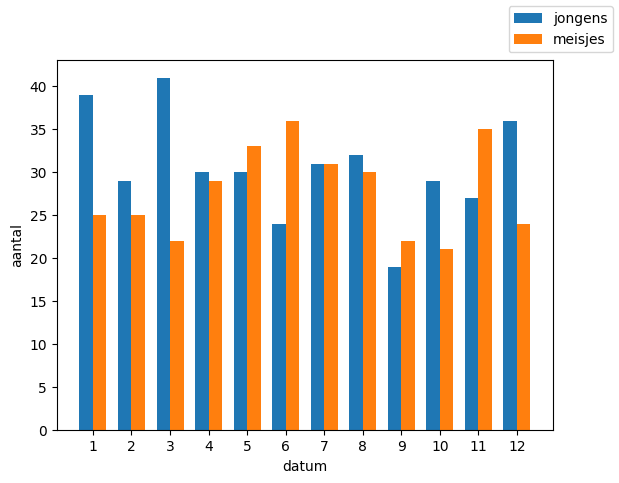

In [72]:
fig, ax = plt.subplots(1)

x = np.arange(len(df3['datum']))
widthb = 0.35


bar1 = ax.bar(x-widthb/2, df3['jongens'], width=widthb, label='jongens')
bar2 = ax.bar(x+widthb/2, df3['meisjes'], width=widthb, label='meisjes')

ax.set_xticks(x)
ax.set_xticklabels(df3['datum'])

ax.set_xlabel('datum')
ax.set_ylabel('aantal')

#fix.tight_layout()
fig.legend()

plt.show()